In [2]:

def calcular_media(a, n):  # Recebe lista e número de medidas
    soma = 0  
    for i in range(len(a)):  
        soma += a[i]  
    media = soma / n  
    return media  

    

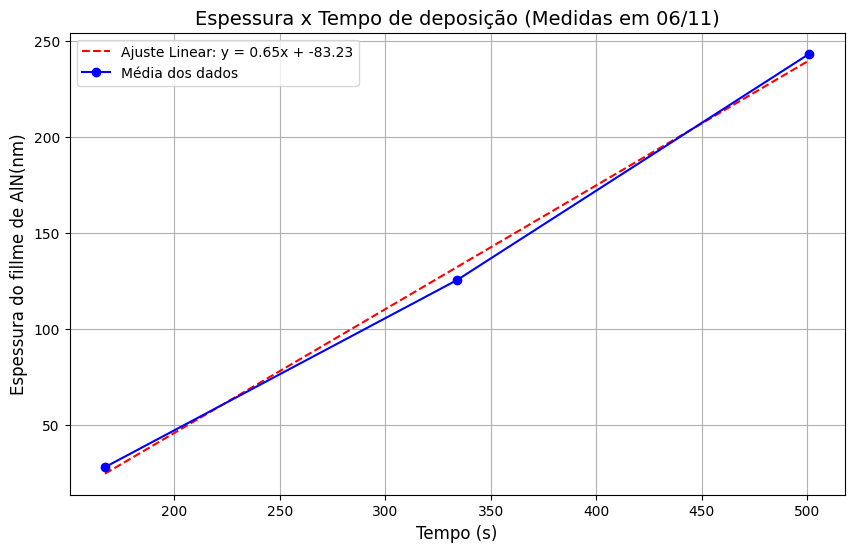

In [17]:
import matplotlib.pyplot as plt
import numpy as np

esp =[]
D100nm= [32.92,20.07,30.8]
D200nm=[105.8,126.6,164.04,105.59]
D300nm= [253.32,283.42,198.39,238.7]
t =[167, 334, 501]
esp.append(calcular_media(D100nm, 3))
esp.append(calcular_media(D200nm, 4))
esp.append(calcular_media(D300nm, 4))


plt.figure(figsize=(10, 6))  
coef = np.polyfit(t, esp, 1)  # Retorna o coeficiente angular e linear
reta = np.polyval(coef, t)  # Calcula os valores da reta com os coeficientes
plt.plot(t, reta, color='r', linestyle='--', label=f'Ajuste Linear: y = {coef[0]:.2f}x + {coef[1]:.2f}')
plt.plot(t, esp, marker='o', linestyle='-', color='b', label='Média dos dados')
plt.title('Espessura x Tempo de deposição (Medidas em 06/11)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Espessura do fillme de AlN(nm)', fontsize=12)

plt.grid(True)
plt.legend()
plt.savefig('EspxTempo_AlN.png')
plt.show()



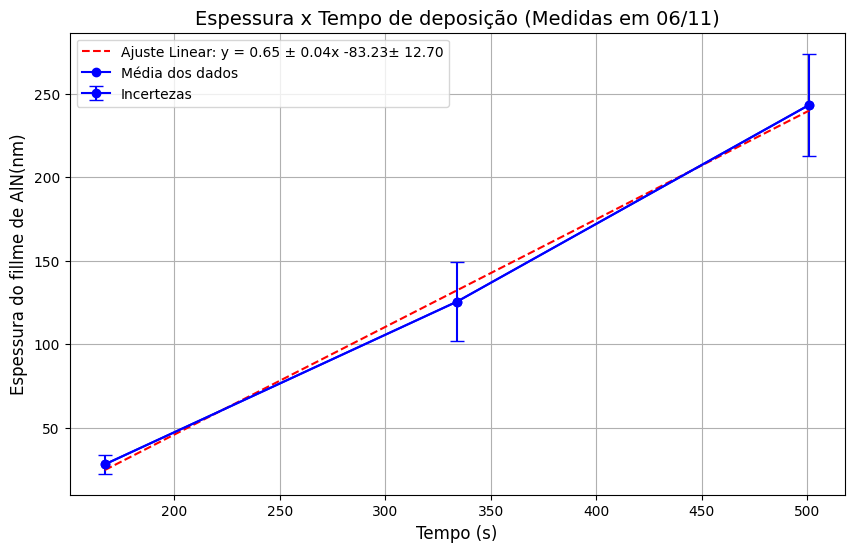

Incerteza no coef angular (slope): 0.04
Incerteza no coef linear (intercept): 12.70


In [30]:
# Alterações pedidas por gustavo

import numpy as np
import matplotlib.pyplot as plt
def calcular_media(a):
    return np.mean(a)  

def calcular_desvio_padrao(a):
    return np.std(a)  # Utilizando a função std() do numpy para desvio padrão

# Listas de dados
D100nm = [32.92, 20.07, 30.8]
D200nm = [105.8, 126.6, 164.04, 105.59]
D300nm = [253.32, 283.42, 198.39, 238.7]
t = [167, 334, 501]

esp = []
desvios = []

# Calculando as médias e desvios padrão
esp.append(calcular_media(D100nm))  # Média de D100nm
esp.append(calcular_media(D200nm))  # Média de D200nm
esp.append(calcular_media(D300nm))  # Média de D300nm

desvios.append(calcular_desvio_padrao(D100nm))  # Desvio de D100nm
desvios.append(calcular_desvio_padrao(D200nm))  # Desvio de D200nm
desvios.append(calcular_desvio_padrao(D300nm))  # Desvio de D300nm
coef, cov = np.polyfit(t, esp, 1, full=False, cov=True)  # Coeficientes e a matriz de covariância

incerteza_slope = np.sqrt(cov[0, 0])  # Incerteza do coeficiente angular
incerteza_intercept = np.sqrt(cov[1, 1])  # Incerteza do coeficiente linear

reta = np.polyval(coef, t)  # Calcula os valores da reta com os coeficientes

plt.figure(figsize=(10, 6))  
plt.errorbar(t, esp, yerr=desvios, fmt='o', linestyle='-', color='b', label='Incertezas', capsize=5)
plt.plot(t, reta, color='r', linestyle='--', label=f'Ajuste Linear: y = {coef[0]:.2f} \u00b1 0.04x {coef[1]:.2f}\u00b1 12.70')
plt.plot(t, esp, marker='o', linestyle='-', color='b', label='Média dos dados')
plt.title('Espessura x Tempo de deposição (Medidas em 06/11)', fontsize=14)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Espessura do fillme de AlN(nm)', fontsize=12)

plt.grid(True)
plt.legend()
plt.savefig('Esp_x_Tempo_AlN.png')
plt.show()

print(f"Incerteza no coef angular (slope): {incerteza_slope:.2f}")
print(f"Incerteza no coef linear (intercept): {incerteza_intercept:.2f}")
plt.show()
